# Assignment09

## Name: YangMyungCheol (양명철)
## ID: 20122776
## Submission Time: 2019.05.30. 13:30

Build a binary classifier to classify digit 0 against all the other digits at MNIST dataset.

Let $x = (x_1, x_2, ... , x_m)$ be a vector representing an image in the dataset.

The prediction function $f_w(x)$ is defined by the linear combination of data (1, x) and the model parameter w:
$f_w(x) = w_0 * 1 + w_1 * x_1 + w_2 * x_2 + ... + w_m * x_m$ 
where $w = (w_0, w_1, ... , w_m)$

The prediction function $f_w(x)$ should have the following values:
$f_w(x)$ = +1 if label(x) = 0
$f_w(x)$ = -1 if label(x) is not 0

The optimal model parameter w is obtained by minimizing the following objective function:
$\sum_i( f_w(x ^(i) - y ^(i) )^2$

1. Compute an optimal model parameter using the training dataset
2. Compute (1) True Positive, (2) False Positive, (3) True Negative, (4) False Negative based on the computed optimal model parameter using (1) training dataset and (2) testing dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as lin
import copy 


In [2]:
tr = pd.read_csv("mnist_train.csv", header=-1)
ts = pd.read_csv("mnist_test.csv", header=-1)


In [3]:
tr_data = np.array(tr)
ts_data = np.array(ts)


In [4]:
tr_y, tr_x = np.split(tr_data, [1], axis=1)


In [5]:
tr_y_bin = copy.copy(tr_y)

In [6]:
for i in range(tr_y_bin.shape[0]):
    if tr_y_bin[i] == 0:
        tr_y_bin[i] =  1
    else:
        tr_y_bin[i] = -1
        

In [7]:
def min_max(data):
    result = (data-data.min()) / (data.max() - data.min())
    return result

In [8]:
number= 20000
tr_x_short = tr_x[:number]
yy = tr_y_bin[:number]

In [9]:
tr_x_scale = min_max(tr_x_short)

In [10]:
one = np.ones((tr_x_scale.shape[0], 1))

In [11]:
A = np.concatenate((one,tr_x_scale),axis = 1)

In [12]:
Beta = np.dot(np.dot(A.T,lin.inv(np.dot(A, A.T))),yy)

### 1. Compute an optimal model parameter using the training dataset


In [13]:
Beta

array([[ 1.86571813e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-2.52511764e+01],
       [-4.08807335e+01],
       [ 1.60362801e+01],
       [ 6.68178338e-01],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-2.67448624e+04],
       [-5.98908363e+01],
       [ 2.59407918e+01],
       [-4.93093848e+01],
       [ 3.8

In [14]:
def sign( data, alpha = 0):
    return np.where(data >= alpha, 1, -1)

In [15]:
def predict(ts_x):
    alpha = 0
    return sign(np.dot(ts_x, Beta), alpha)

### 2. Compute (1) True Positive, (2) False Positive, (3) True Negative, (4) False Negative based on the computed optimal model parameter using (1) training dataset and

In [16]:
predict_val_tr = predict(A)

In [17]:
predict_val_tr_ar = np.array([predict_val_tr])

In [18]:
TP_index_tr = []
TN_index_tr = []
FP_index_tr = []
FN_index_tr = []


In [19]:
for i in range(yy.shape[0]):
    if yy[i][0] == 1 and predict_val_tr_ar[0][i][0] == 1:
        TP_index_tr.append(i)
    elif yy[i][0] == 1 and predict_val_tr_ar[0][i][0] == -1:
        TN_index_tr.append(i)
    elif yy[i][0] == -1 and predict_val_tr_ar[0][i][0] == 1:
        FP_index_tr.append(i)
    elif yy[i][0] == -1 and predict_val_tr_ar[0][i][0] == -1:
        FN_index_tr.append(i)        
        

In [20]:
F_score_tr = [len(TP_index_tr), len(FP_index_tr),len(TN_index_tr), len(FN_index_tr)]
TP_image_tr = np.zeros(tr_x_short.shape[1])
TN_image_tr = np.zeros(tr_x_short.shape[1])
FP_image_tr = np.zeros(tr_x_short.shape[1])
FN_image_tr= np.zeros(tr_x_short.shape[1])


In [21]:
for i in TP_index_tr:
    TP_image_tr += tr_x_short[i]/len(TP_index_tr)
    
for i in TN_index_tr:
    TN_image_tr += tr_x_short[i]/len(TN_index_tr)

for i in FP_index_tr:
    FP_image_tr += tr_x_short[i]/len(FP_index_tr)

for i in FN_index_tr:
    FN_image_tr += tr_x_short[i]/len(FN_index_tr)



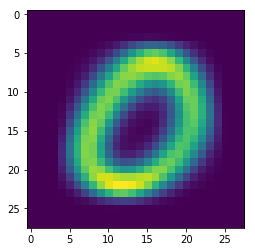

In [22]:
plt.imshow(TP_image_tr.reshape((28,28)))
plt.show()

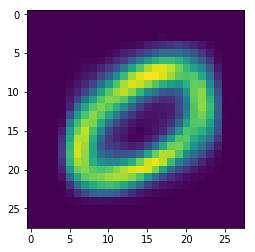

In [23]:
plt.imshow(TN_image_tr.reshape((28,28)))
plt.show()

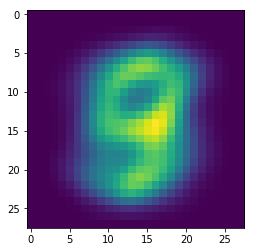

In [24]:
plt.imshow(FP_image_tr.reshape((28,28)))
plt.show()

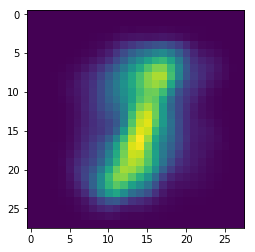

In [25]:
plt.imshow(FN_image_tr.reshape((28,28)))
plt.show()

In [26]:
F_score_tr

[1797, 13202, 197, 4804]

### 2. Compute (1) True Positive, (2) False Positive, (3) True Negative, (4) False Negative based on the computed optimal model parameter using  (2) testing dataset.

In [27]:
ts_y, ts_x = np.split(ts_data, [1], axis=1)


In [28]:
ts_y_bin = copy.copy(ts_y)

In [29]:
for i in range(ts_y_bin.shape[0]):
    if ts_y_bin[i] == 0:
        ts_y_bin[i] =  1
    else:
        ts_y_bin[i] = -1
        

In [30]:
one2 = np.ones((ts_x.shape[0], 1))

In [31]:
ts_x_scale = min_max(ts_x)

In [32]:
A2 = np.concatenate((one2,ts_x_scale),axis = 1)

In [33]:
predict_val = predict(A2)

In [34]:
predict_val = np.array([predict_val])

In [35]:
TP_index = []
TN_index = []
FP_index = []
FN_index = []


In [36]:
for i in range(ts_y.shape[0]):
    if ts_y_bin[i][0] == 1 and predict_val[0][i][0] == 1:
        TP_index.append(i)
    elif ts_y_bin[i][0] == 1 and predict_val[0][i][0] == -1:
        TN_index.append(i)
    elif ts_y_bin[i][0] == -1 and predict_val[0][i][0] == 1:
        FP_index.append(i)
    elif ts_y_bin[i][0] == -1 and predict_val[0][i][0] == -1:
        FN_index.append(i)        
        

In [37]:
ts = np.array(ts)
_, ts = np.split(ts, [1], axis=1)
F_score = [len(TP_index), len(FP_index),len(TN_index), len(FN_index)]
TP_image = np.zeros(ts.shape[1])
TN_image = np.zeros(ts.shape[1])
FP_image = np.zeros(ts.shape[1])
FN_image = np.zeros(ts.shape[1])

for i in TP_index:
    TP_image += ts[i]/len(TP_index)
    
for i in TN_index:
    TN_image += ts[i]/len(TN_index)

for i in FP_index:
    FP_image += ts[i]/len(FP_index)

for i in FN_index:
    FN_image += ts[i]/len(FN_index)



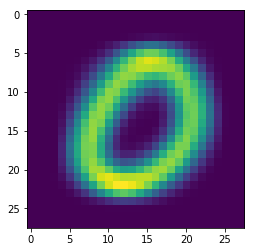

In [38]:
plt.imshow(TP_image.reshape((28,28)))
plt.show()

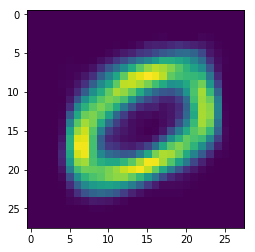

In [39]:
plt.imshow(TN_image.reshape((28,28)))
plt.show()

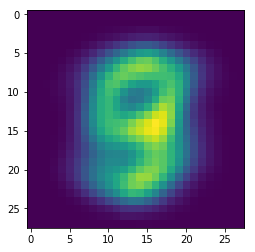

In [40]:
plt.imshow(FP_image.reshape((28,28)))
plt.show()

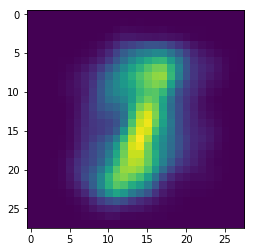

In [41]:
plt.imshow(FN_image.reshape((28,28)))
plt.show()

In [42]:
print(F_score)

[877, 6703, 103, 2317]
